In [54]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [55]:
df = pd.read_csv('../Lab 1/AIDS_Classification.csv')
df.head()

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
0,948,2,48,89.8128,0,0,0,100,0,0,...,0,1,0,1,0,422,477,566,324,0
1,1002,3,61,49.4424,0,0,0,90,0,1,...,1,3,0,1,0,162,218,392,564,1
2,961,3,45,88.4520,0,1,1,90,0,1,...,1,3,0,1,1,326,274,2063,1893,0
3,1166,3,47,85.2768,0,1,0,100,0,1,...,1,3,0,1,0,287,394,1590,966,0
4,1090,0,43,66.6792,0,1,0,100,0,1,...,1,3,0,0,0,504,353,870,782,0


In [56]:
from sklearn.preprocessing import StandardScaler
X = df.drop(columns=['infected'])
y = df['infected']
X = np.array(X)
y = np.array(y)
for i in range(0, 3):
    print(X[i, :])
print(y)

[948.       2.      48.      89.8128   0.       0.       0.     100.
   0.       0.       0.       0.       0.       0.       1.       0.
   1.       0.     422.     477.     566.     324.    ]
[1.00200e+03 3.00000e+00 6.10000e+01 4.94424e+01 0.00000e+00 0.00000e+00
 0.00000e+00 9.00000e+01 0.00000e+00 1.00000e+00 8.95000e+02 0.00000e+00
 0.00000e+00 1.00000e+00 3.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00
 1.62000e+02 2.18000e+02 3.92000e+02 5.64000e+02]
[9.6100e+02 3.0000e+00 4.5000e+01 8.8452e+01 0.0000e+00 1.0000e+00
 1.0000e+00 9.0000e+01 0.0000e+00 1.0000e+00 7.0700e+02 0.0000e+00
 1.0000e+00 1.0000e+00 3.0000e+00 0.0000e+00 1.0000e+00 1.0000e+00
 3.2600e+02 2.7400e+02 2.0630e+03 1.8930e+03]
[0 1 0 ... 0 1 0]


In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 40)

# 1. Зниження розмірності і візуалізація даних

1. Зниження розмірності і візуалізація даних
Застосуйте методи зниження розмірності sklearn.decomposition.PCA і sklearn.manifold.TSNE для візуалізації даних, з якими ви працювали в лабораторній № 1 (знижуючи розмірність до двох). Візуалізуйте результат.

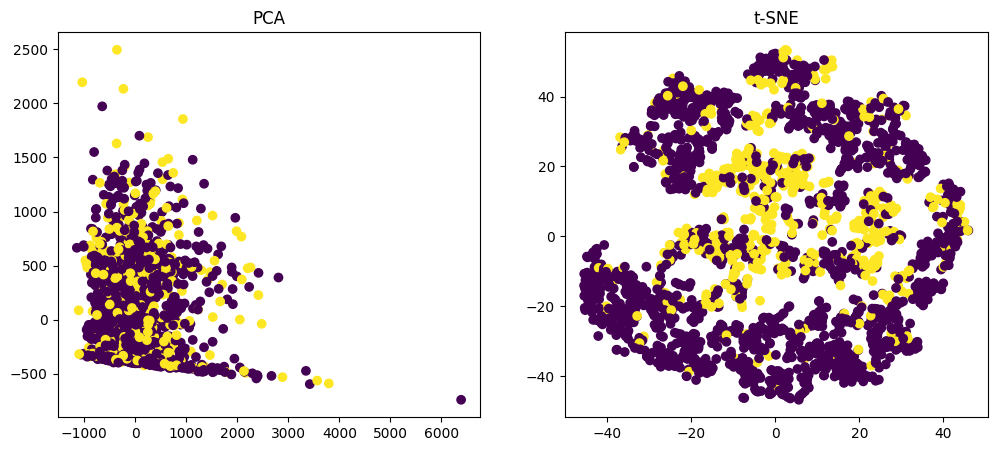

In [58]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)


plt.figure(figsize=(12, 5)) # Візуалізація результатів PCA
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.title('PCA')


plt.subplot(1, 2, 2) # Візуалізація результатів t-SNE
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis')
plt.title('t-SNE')

plt.show()

# 2. Кластерний аналіз

1. За допомогою алгоритму k-means зробіть квантування зображення (видалення візуально надлишкової інформації) з глибиною 64, 32, 16 та 8 рівнів для будь-якого обраного самостійно зображення.

In [59]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_sample_image
from sklearn.metrics import pairwise_distances_argmin
from sklearn.utils import shuffle

# K-means

In [60]:
class My_k_means:

    def __init__(self, n_clusters, max_iter, eps):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.eps = eps
        self.clusters_ = None
        self.our_means_ = None
        self.partitioning_ = None

    def dist(self, x1, x2):
        return np.linalg.norm(x1 - x2)

    def fit(self, X):
        m = X.shape[0]
        our_means_indexes = np.random.choice(X.shape[0], size=self.n_clusters, replace=False)
        our_means = X[our_means_indexes] # random centroids
        matrix_distances = np.zeros((m, self.n_clusters))
        min_indexes = np.zeros(m)
        our_means_new = np.copy(our_means)   

        for t in range(0, self.max_iter):
            # Assignment step
            for i in range(0, m):
                for j in range(0, self.n_clusters):
                    matrix_distances[i, j] = self.dist(X[i, :], our_means[j])

                min_indexes[i] = np.argmin(matrix_distances[i, :]) # номер кластеру якому належить i-та точка датасету - predict
           
            min_indexes = min_indexes.astype(np.int32)
            S = [ X[min_indexes == i] for i in range(0, self.n_clusters) ] # partitioning

        # Update means step:
            for i in range(0, self.n_clusters):
                our_means_new[i] = ( 1 / S[i].shape[0] ) * np.sum(S[i], axis=0)

            diff = np.abs(our_means_new - our_means)

            if np.max(diff) <= self.eps:
                break

            our_means = our_means_new
            
        # Derive our variables
        self.clusters_ = min_indexes
        self.our_means_ = our_means
        self.partitioning_ = S
        return self
    
    def predict(self, X_new):
        '''
         The predict method works with these clusters: 
         it takes the new X_new points, checks their distance to each of the cluster centres, 
         and assigns each point the label of the nearest cluster.
        '''
        m_new = X_new.shape[0]
        m_means = self.our_means_.shape[0]

        matrix_distances_new = np.zeros((m_new, m_means))
        min_indexes_new = np.zeros(m_new)

        for i in range(0, m_new):
            for j in range(0, m_means):
                matrix_distances_new[i, j] = self.dist(X_new[i, :], self.our_means_[j, :])
            min_indexes_new[i] = np.argmin(matrix_distances_new[i, :])
        
        min_indexes_new = min_indexes_new.astype(np.int32)
        return min_indexes_new

In [61]:
X = np.array([[1, 2], [1, 4], [1, 0],
              [10, 2], [10, 4], [10, 0]])
X_new = np.array([[0, 0], 
                  [12, 3]])
my_k_means = My_k_means(n_clusters=2, max_iter=1000, eps=1e-10)
my_k_means.fit(X)
y_hat = my_k_means.predict(X_new)
print(f'Clusters: {my_k_means.clusters_}')
print(f'y_hat: {y_hat}')
print(f'S : {my_k_means.partitioning_}')
print(f'Centers of clusters: {my_k_means.our_means_}')

Clusters: [1 1 1 0 0 0]
y_hat: [1 0]
S : [array([[10,  2],
       [10,  4],
       [10,  0]]), array([[1, 2],
       [1, 4],
       [1, 0]])]
Centers of clusters: [[10  2]
 [ 1  2]]


In [62]:
kmeans = KMeans(n_clusters=2, max_iter=1000).fit(X)
print(f'Clusters: {kmeans.labels_}')
print(f'y_hat: {kmeans.predict(X_new)}')

Clusters: [1 1 1 0 0 0]
y_hat: [1 0]


C:\Users\Ivan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# K-means++

In [63]:
class My_k_means_plus_plus:

    def __init__(self, n_clusters, max_iter, eps):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.eps = eps
        self.centers_ = None
        self.clusters_ = None
        self.partitioning_ = None
        

    def square_distance(self, x1: float, x2: float) -> float :
        return (np.linalg.norm(x1 - x2)) ** 2
    
    def init_centres(self, X):
        m, n = X.shape
        c = np.zeros((self.n_clusters, n))
        matrix_of_distances_to_centres = np.zeros((self.n_clusters - 1, m))
        index_of_centre = np.random.choice(m, size=1, replace=False)

        c[0] = X[index_of_centre]
        
        for i in range(1, self.n_clusters):
            for j in range(0, X.shape[0]):
                matrix_of_distances_to_centres[i - 1, j] = self.square_distance(c[i - 1], X[j, :])
            index_of_max_distance = np.argmax(matrix_of_distances_to_centres[i - 1, :])
            c[i] = X[index_of_max_distance]

        self.centers_ = c

    def fit(self, X):
        m = X.shape[0]
        self.init_centres(X)
        matrix_of_distances_to_centres_for_fit = np.zeros((m, self.n_clusters))
        clusters = np.zeros(m)
        centres_new_ = np.zeros_like(self.centers_)
        for t in range(0, self.max_iter):
            # Assigning step
            for i in range(0, m):
                for j in range(0, self.n_clusters):
                    matrix_of_distances_to_centres_for_fit[i, j] = self.square_distance(X[i, :], self.centers_[j, :])
                index_of_assigning = np.argmin(matrix_of_distances_to_centres_for_fit[i, :])
                clusters[i] = index_of_assigning
            clusters = clusters.astype(np.int32)

            # Update centres step
            S = [ X[clusters == i] for i in range(0, self.n_clusters) ]

            for i in range(0, self.n_clusters):
                centres_new_[i, :] = (1 / len(S[i])) * np.sum(S[i], axis=0)
            
            diff = np.abs(self.centers_ - centres_new_)

            if np.max(diff) <= self.eps:
                break

            centres_new = self.centers_
            
        self.clusters_ = clusters
        self.centers_ = centres_new
        self.partitioning_ = S
    
    def predict(self, X_new):
        m = X_new.shape[0]
        matrix_of_distances_to_centres_for_predict = np.zeros((m, self.n_clusters))
        clusters_for_new_point = np.zeros(m)
        for i in range(0, m):
            for j in range(0, self.n_clusters):
                matrix_of_distances_to_centres_for_predict[i, j] = self.square_distance(X_new[i, :], self.centers_[j, :])
            idex_for_assigning_new_point = np.argmin(matrix_of_distances_to_centres_for_predict[i, :])
            clusters_for_new_point[i] = idex_for_assigning_new_point

        clusters_for_new_point = clusters_for_new_point.astype(np.int32)
        return clusters_for_new_point

In [64]:
my_k_means_plus_plus = My_k_means_plus_plus(n_clusters=2, max_iter=1000, eps=1e-10)
my_k_means_plus_plus.fit(X)
y_hat = my_k_means_plus_plus.predict(X_new)
print(f'Clusters: {my_k_means_plus_plus.clusters_}')
print(f'y_hat: {y_hat}')
print(f'S : {my_k_means_plus_plus.partitioning_}')
print(f'Centers of clusters: {my_k_means_plus_plus.centers_}')

Clusters: [0 0 0 1 1 1]
y_hat: [0 1]
S : [array([[1, 2],
       [1, 4],
       [1, 0]]), array([[10,  2],
       [10,  4],
       [10,  0]])]
Centers of clusters: [[ 1.  2.]
 [10.  4.]]


In [65]:
kmeans = KMeans(n_clusters=2, init='k-means++', n_init="auto")
kmeans.fit(X)
y_hat = kmeans.predict(X_new)
print(f'Clusters: {kmeans.labels_}')
print(f'y_hat: {y_hat}')
print(f'Centers of clusters: {kmeans.cluster_centers_}')

Clusters: [0 0 0 1 1 1]
y_hat: [0 1]
Centers of clusters: [[ 1.  2.]
 [10.  2.]]


In [66]:
import cv2
beverly = cv2.imread("../Lab 2/beverly.jpg")
n_colors = 64 # глибина
print(beverly)

[[[233 235 229]
  [233 235 229]
  [233 235 229]
  ...
  [230 230 230]
  [231 231 231]
  [232 232 232]]

 [[233 235 229]
  [233 235 229]
  [233 235 229]
  ...
  [234 234 234]
  [235 235 235]
  [236 236 236]]

 [[233 235 229]
  [233 235 229]
  [233 235 229]
  ...
  [237 237 237]
  [238 238 238]
  [239 239 239]]

 ...

 [[225 236 240]
  [224 235 239]
  [224 235 239]
  ...
  [118 137 152]
  [130 148 165]
  [137 153 170]]

 [[225 236 240]
  [224 235 239]
  [224 235 239]
  ...
  [130 146 163]
  [143 157 176]
  [149 163 182]]

 [[225 236 240]
  [224 235 239]
  [224 235 239]
  ...
  [128 144 161]
  [144 155 177]
  [150 161 183]]]


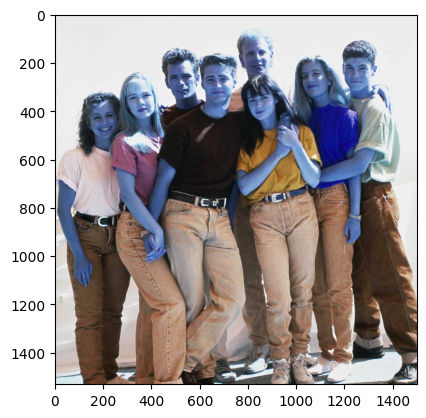

In [67]:
plt.imshow(beverly)

In [68]:
reshaped_image = np.reshape(
    beverly, 
      ((beverly.shape[0] * beverly.shape[1]), 3))
print(reshaped_image)

[[233 235 229]
 [233 235 229]
 [233 235 229]
 ...
 [128 144 161]
 [144 155 177]
 [150 161 183]]


In [69]:
n_depth = [64, 32, 16, 8]

C:\Users\Ivan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Depth = 64


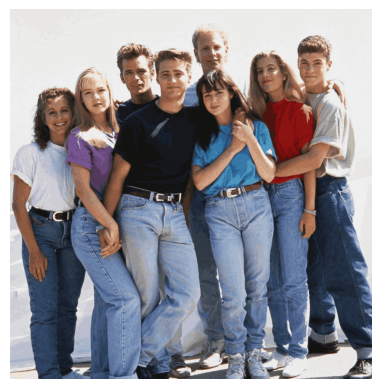

C:\Users\Ivan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Depth = 32


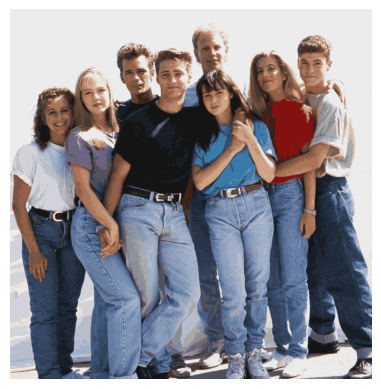

C:\Users\Ivan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Depth = 16


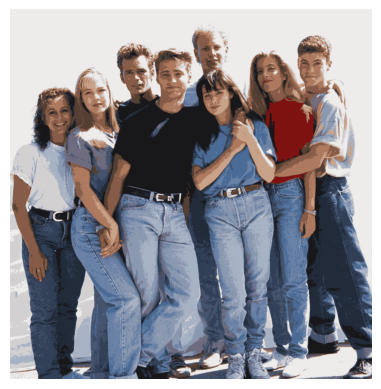

C:\Users\Ivan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Depth = 8


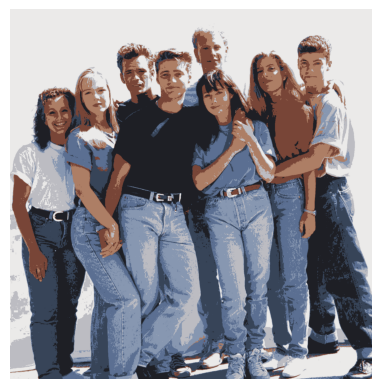

In [70]:
for deph_quantize in n_depth:
    model = KMeans(n_clusters=deph_quantize)
    target = model.fit_predict(reshaped_image)
    color_space = model.cluster_centers_
    output_image = np.reshape(color_space.astype("uint8")[target], (beverly.shape[0], beverly.shape[1], 3))
    con_image = cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB)
    print(f'Depth = {deph_quantize}')
    plt.figure()  
    plt.imshow(con_image)
    plt.axis("off")
    plt.show()

# 3. Обробка та класифікація текстових даних

Завантажте набір текстових даних (з мітками класів). Проведіть передобробку даних (видаліть стоп-слова, пунктуацію), за допомогою wordcloud зробіть візуалізацію найбільш поширених слів або n-gram у кожному класі. Векторизуйте тексти (наприклад за допомогою sklearn.feature_extraction.text.TfidfVectorizer). Проведіть класифікацію текстових даних, зробіть оцінку якості. 

In [71]:
df = pd.read_csv('../Lab 2/Leetcode_Questions.csv')
df.head()

,Question_No,Question,Acceptance,isPremium,Difficulty,Question_Link,Solution
0,1,Two Sum,53.80%,False,Easy,https://leetcode.com/problems/two-sum/description,https://leetcode.com/problems/two-sum/solutions
1,2,Add Two Numbers,44.10%,False,Medium,https://leetcode.com/problems/add-two-numbers/...,https://leetcode.com/problems/add-two-numbers/...
2,3,Longest Substring Without Repeating Characters,35.40%,False,Medium,https://leetcode.com/problems/longest-substrin...,https://leetcode.com/problems/longest-substrin...
3,4,Median of Two Sorted Arrays,41.50%,False,Hard,https://leetcode.com/problems/median-of-two-so...,https://leetcode.com/problems/median-of-two-so...
4,5,Longest Palindromic Substring,34.40%,False,Medium,https://leetcode.com/problems/longest-palindro...,https://leetcode.com/problems/longest-palindro...


Передобробка для стовпця Question

In [72]:
import nltk
import re
import string
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from nltk.corpus import stopwords

In [73]:
text = 'I mksldf,df sf s'
stop_words = stopwords.words("english")
text = ' '.join([word for word in text.split(' ') if word not in stop_words])

In [74]:
# example of text cleaning function
def clean_text(text):
    stop_words = stopwords.words("english")
    text = ' '.join([word for word in text.split(' ') if word not in stop_words])
    text = text.lower()
    text = re.sub("@\S+", " ", text)
    text = re.sub("https*\S+", " ", text)
    text = re.sub("#\S+", " ", text)
    text = re.sub("\d", " ", text)
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    text = re.sub('\n', ' ', text)
    text = re.sub('\s{2,}',' ', text)
    text = ' '.join([word for word in text.split(' ') if word not in stop_words])
    return text

In [75]:
df['Processed_Question'] = df['Question'].apply(clean_text)
print(df[['Question', 'Processed_Question']].head())

                                          Question  \
0                                          Two Sum   
1                                  Add Two Numbers   
2   Longest Substring Without Repeating Characters   
3                      Median of Two Sorted Arrays   
4                    Longest Palindromic Substring   

                                Processed_Question  
0                                          two sum  
1                                  add two numbers  
2   longest substring without repeating characters  
3                         median two sorted arrays  
4                    longest palindromic substring  


Візуалізація за допомогою wordcloud

In [76]:
from wordcloud import WordCloud

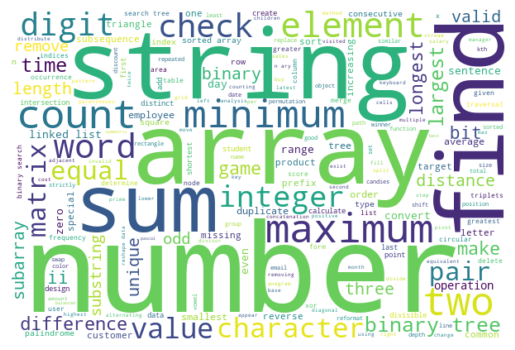

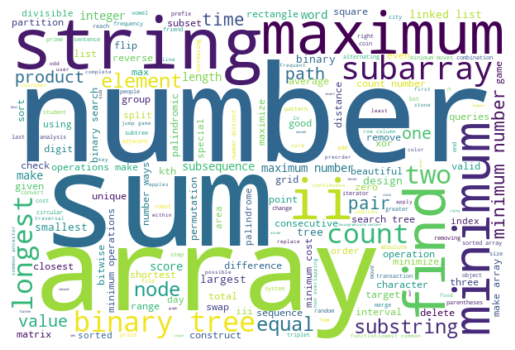

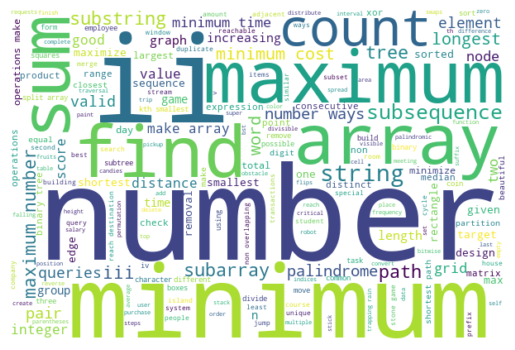

In [77]:
def visualize(label):
    text = ''
    for msg in df[df['Difficulty'] == label]['Processed_Question']:
        msg = msg.lower()
        text += msg + ' '
    wordcloud = WordCloud(width=600, height=400, background_color="white").generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Виклик функції
visualize('Easy')
visualize('Medium')
visualize('Hard')

Векторизуйте тексти (наприклад за допомогою sklearn.feature_extraction.text.TfidfVectorizer). Проведіть класифікацію текстових даних, зробіть оцінку якості.

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [79]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Processed_Question'])
print(X)

  (0, 1796)	0.6471381055255171
  (0, 1929)	0.7623727909473453
  (1, 1186)	0.5482508443394766
  (1, 18)	0.6787193334046793
  (1, 1929)	0.4886318431536763
  (2, 281)	0.40991334700635196
  (2, 1488)	0.5098512337569663
  (2, 2056)	0.5370960904316322
  (2, 1783)	0.4020720400630011
  (2, 1045)	0.3491255241674287
  (3, 86)	0.48719238057715053
  (3, 1684)	0.47613251427488124
  (3, 1094)	0.611974522716337
  (3, 1929)	0.40178177746627647
  (4, 1244)	0.6648504135126124
  (4, 1783)	0.5640213895778433
  (4, 1045)	0.4897487108209546
  (5, 399)	0.7554209823617883
  (5, 2078)	0.6552397571939226
  (6, 927)	0.6822236770474079
  (6, 1521)	0.7311435252232724
  (7, 103)	0.7768555405516812
  (7, 1757)	0.36770027932808785
  (7, 927)	0.511167265869208
  (8, 1185)	0.4830973188779495
  :	:
  (2906, 21)	0.48371454165964345
  (2906, 1645)	0.3691723888885529
  (2906, 548)	0.3691723888885529
  (2906, 883)	0.2607212271522169
  (2907, 817)	0.5801745838297158
  (2907, 49)	0.6219579528642157
  (2907, 884)	0.52589519597

In [80]:
df['Difficulty_label'] = df['Difficulty'].map({'Easy': 0, 'Medium': 1, 'Hard': 2})
y = df['Difficulty_label']
print(y)

0       0
1       1
2       1
3       2
4       1
       ..
2908    0
2909    1
2910    0
2911    1
2912    2
Name: Difficulty_label, Length: 2913, dtype: int64


In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_hat = model.predict(X_test)
print(classification_report(y_hat, y_test))

              precision    recall  f1-score   support

           0       0.16      0.42      0.24        99
           1       0.87      0.55      0.67       863
           2       0.12      0.43      0.18        58

    accuracy                           0.53      1020
   macro avg       0.38      0.47      0.36      1020
weighted avg       0.76      0.53      0.60      1020

